In [ ]:
# # Importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Importing the dataset
df = pd.read_csv("datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn - datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(300)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,8203-XJZRC,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,20.25,No
296,6556-DBKZF,Female,0,Yes,Yes,71,Yes,No,Fiber optic,No,No,Yes,No,No,No,Two year,No,Electronic check,76.05,5436.45,No
297,6851-WEFYX,Male,1,Yes,No,35,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,3437.50,No
298,2985-JUUBZ,Male,0,Yes,Yes,40,Yes,Yes,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.55,3015.75,No


In [ ]:
df.info() # Checking basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Looking for columns with objet type
for col in df.columns:
    if (df[col].dtype == 'object'):
        unique = len(df[col].unique())
        print("Column ", col, " has ", unique, " unique features")


Column  customerID  has  7043  unique features
Column  gender  has  2  unique features
Column  Partner  has  2  unique features
Column  Dependents  has  2  unique features
Column  PhoneService  has  2  unique features
Column  MultipleLines  has  3  unique features
Column  InternetService  has  3  unique features
Column  OnlineSecurity  has  3  unique features
Column  OnlineBackup  has  3  unique features
Column  DeviceProtection  has  3  unique features
Column  TechSupport  has  3  unique features
Column  StreamingTV  has  3  unique features
Column  StreamingMovies  has  3  unique features
Column  Contract  has  3  unique features
Column  PaperlessBilling  has  2  unique features
Column  PaymentMethod  has  4  unique features
Column  Churn  has  2  unique features


In [ ]:
# Dropping the customerID column
df = df.drop(["customerID"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df_labeled = df.copy()
df_labeled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:

# Label encoding the columns with object type
le = LabelEncoder()
for col in df_labeled.columns:
    if (df_labeled[col].dtype == 'object'):
        df_labeled[col] = le.fit_transform(df_labeled[col])
        

In [ ]:
# Checking the correlation between the features and the label
correlation = df_labeled.corr()
correlation['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199484
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

In [ ]:
# Dropping high non-significant columns
df_labeled = df_labeled.drop(['gender', 'InternetService', 'StreamingMovies', 'StreamingTV', 'PhoneService', 'MultipleLines'], axis=1)

In [ ]:
# Filling in missing values for the total charges column
avg = df_labeled['TotalCharges'].mean()
df_labeled['TotalCharges'] = df_labeled['TotalCharges'].fillna(avg)
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int64  
 5   OnlineBackup      7043 non-null   int64  
 6   DeviceProtection  7043 non-null   int64  
 7   TechSupport       7043 non-null   int64  
 8   Contract          7043 non-null   int64  
 9   PaperlessBilling  7043 non-null   int64  
 10  PaymentMethod     7043 non-null   int64  
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7043 non-null   float64
 13  Churn             7043 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 770.5 KB


In [ ]:
# Extracting all fields in the dataset where customers churned
df_churned = df[df['Churn'] == 'Yes']
df_churned

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


<BarContainer object of 3 artists>

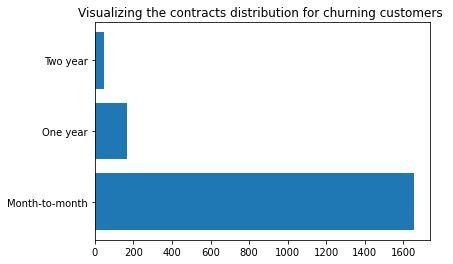

In [ ]:
# Checking the Contracts distribution per type
contract_piv = df_churned.pivot_table('Churn', index = 'Contract',aggfunc='count')
plt.title('Visualizing the contracts distribution for churning customers ')
plt.barh(contract_piv.index, contract_piv['Churn'])

([<matplotlib.patches.Wedge at 0x7fe95bdc9fd0>,
 [Text(-0.008320436930535607, 1.0999685315177363, 'Female'),
  Text(0.008320539917022102, -1.099968530738716, 'Male')],
 [Text(-0.004538420143928512, 0.5999828353733107, '50.2%'),
  Text(0.004538476318375692, -0.5999828349483904, '49.8%')])

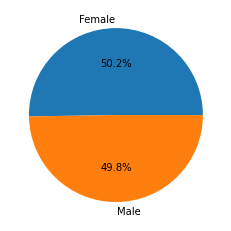

In [ ]:
# Checking which gender has the most churned customers
gender_piv = df_churned.pivot_table('Churn', index = 'gender',aggfunc='count')
plt.pie(gender_piv['Churn'], labels = gender_piv.index, autopct='%1.1f%%')

<BarContainer object of 3 artists>

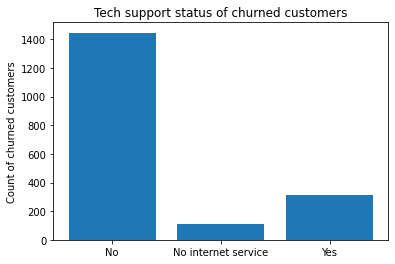

In [ ]:
# Checking different tech support status
support_piv = df_churned.pivot_table('Churn', index = 'TechSupport',aggfunc='count')
plt.title("Tech support status of churned customers")
plt.ylabel("Count of churned customers")
plt.bar(support_piv.index, support_piv['Churn'])

([<matplotlib.patches.Wedge at 0x7fe95bd062b0>,
 [Text(-0.7662937396224232, 0.7891729244059772, '0'),
  Text(0.766293739622423, -0.7891729244059773, '1')],
 [Text(-0.4179784034304126, 0.4304579587668966, '74.5%'),
  Text(0.41797840343041254, -0.4304579587668967, '25.5%')])

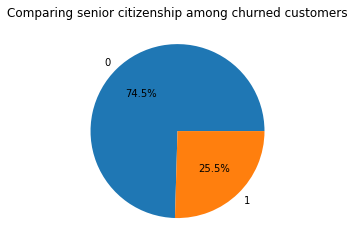

In [ ]:
citizen_piv = df_churned.pivot_table('Churn', index = 'SeniorCitizen',aggfunc='count')
plt.title("Comparing senior citizenship among churned customers")
plt.pie(citizen_piv['Churn'], labels = citizen_piv.index, autopct='%1.1f%%')

Building the XGB model

In [ ]:
# Shuffling the dataset
df_shuffled = df_labeled.reindex(np.random.permutation(df_labeled.index))
# df_shuffled

In [ ]:
df_shuffled

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2186,0,1,1,46,1,1,1,1,2,0,1,19.95,862.40,0
3275,0,1,0,14,1,1,1,1,2,0,3,20.40,292.40,0
3575,0,0,0,59,0,0,0,2,0,1,2,51.70,3005.80,0
3219,0,1,1,24,1,1,1,1,2,0,3,24.70,571.75,0
4964,0,0,0,26,0,0,0,0,0,1,0,74.95,1834.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,0,0,0,17,0,0,0,0,0,0,1,25.10,382.80,0
2504,0,0,0,2,2,0,0,0,0,1,2,75.70,189.20,1
4970,0,0,0,7,0,0,0,0,1,1,1,24.35,150.85,0
6952,0,0,0,48,0,2,2,0,0,1,0,107.40,5121.30,1


In [ ]:
# Splitting the dataset into data and label
df_train = df_shuffled.drop(['Churn'], axis=1)
df_target = df_shuffled['Churn']

df_train.shape, df_target.shape

((7043, 13), (7043,))

In [ ]:
# Splitting the data and label into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, test_size=0.2) # Allocating 20% of the observation for testing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 13), (1409, 13), (5634,), (1409,))

In [ ]:
# Fitting the data into the model
model = xgb.XGBClassifier(max_depth=5, learning_rate=0.03)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = roc_auc_score(y_pred, y_test)
print("Our model\'s accuracy by computing the area under the curve is: ", accuracy*100, "%")

Our model's accuracy by computing the area under the curve is:  77.7495381976514 %


# Saving the model

In [ ]:
import pickle

# save the model as a file
filename = 'customer_churn_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
infile = open("churn_model.pkl", 'rb')
model = pickle.load(infile)

In [ ]:
# # User input test with the prediction model 
# # No churn values
# # vals = pd.to_numeric(['1', '0', '1', '50', '0', '0', '0','0', '0', '2', '0', '20', '100'])

# #  churn values
# vals = pd.to_numeric(['1',	'1',	'0',	'4',	'0',	'0'	,'0',	'0',	'0',	'1'	,'3'	,'74.40'	,'306.60'])
# # SeniorCitizen	Partner	Dependents	tenure	OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport	Contract	PaperlessBilling	PaymentMethod	MonthlyCharges	TotalCharges

# vals_df = pd.DataFrame([vals], columns=['SeniorCitizen',	'Partner',	'Dependents',	'tenure',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'Contract',	'PaperlessBilling',	'PaymentMethod',	'MonthlyCharges',	'TotalCharges'])
# prediction = model.predict(vals_df)
# # features
# prediction
# # input_vals

array([1])

In [ ]:
df_labeled

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,2,1,1,3,84.80,1990.50,0
7039,0,1,1,72,0,2,2,0,1,1,1,103.20,7362.90,0
7040,0,1,1,11,2,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,4,0,0,0,0,0,1,3,74.40,306.60,1
